Food Delivery Company Data Analysis Project

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import csv file
df = pd.read_csv('Zomato data .csv', encoding= 'unicode_escape')

In [4]:
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [5]:
#change datatype of rate column
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Question 1 : What type of Resturent do the majority of customers oreder from?

<function matplotlib.pyplot.show(close=None, block=None)>

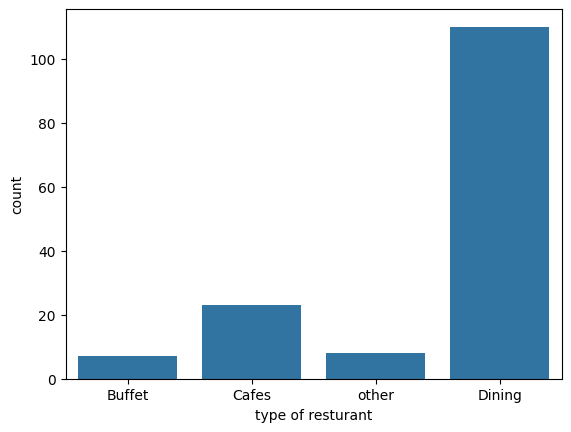

In [8]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of resturant")
plt.show

Answer 1 : Majority of resturant falls in Dining Catagory

Question 2 : How many votes has each type of restaurants have received?

<function matplotlib.pyplot.show(close=None, block=None)>

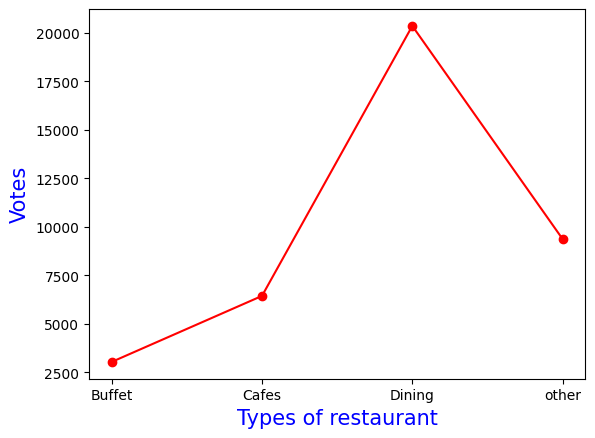

In [10]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="red",marker="o")
plt.xlabel("Types of restaurant",c="blue",size=15)
plt.ylabel("Votes",c="blue",size=15)
plt.show

Answer 2 : Daining Restaurants has recieved maximum votes

Question 3 : What are the ratings that the majority of restaurants have received?

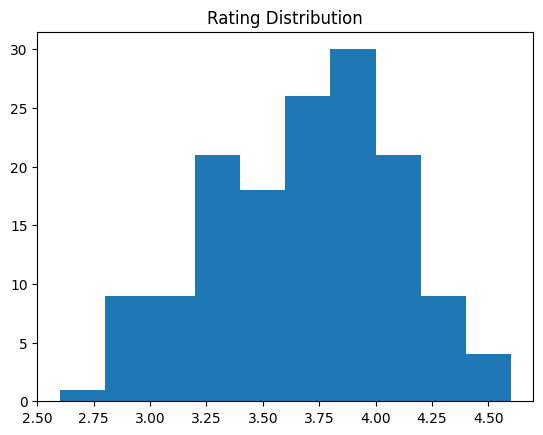

In [13]:
plt.hist(df['rate'],bins=10)
plt.title("Rating Distribution")
plt.show()

Answer 3 : The Majority Resturents received ratings from 3.5 to 4

Question 4 : Company has observed that most couples order most of their food online. What is their average spending on each order?

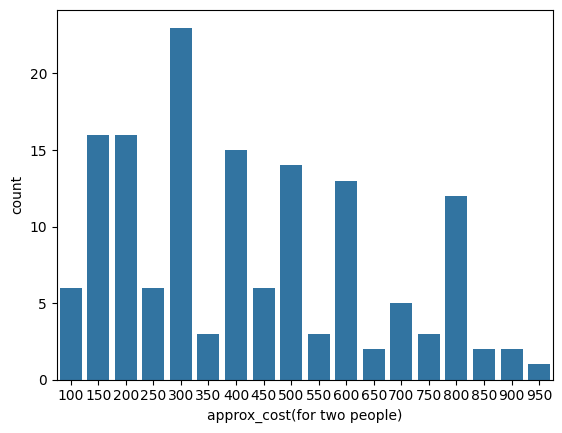

In [16]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.show()

Answer : The majority of couples prefer resturants with an approximate cost of 300 rs

Question 5 : Which mode(online or offline) has received the maximum rating?

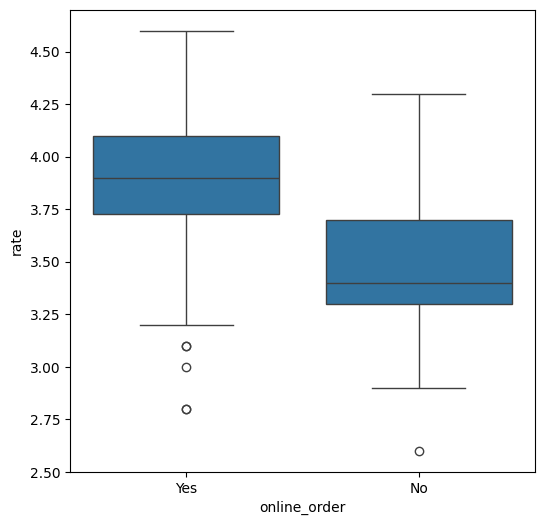

In [17]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)
plt.show()

Answer 5 : Offlinr order received lower rating in comparison to online order.

Question 6 : Which type of restaurant received more offline orders, so that the company can provide those customers with some good offers?

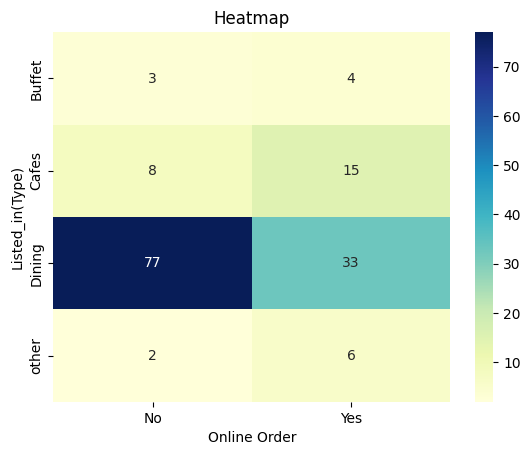

In [19]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed_in(Type)")
plt.show()

Answer 6 : Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders.This suggests that clients prefer to place order in person at restaurants, but prefer online ordering at cafes. 